In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Explore

In [5]:
data=pd.read_csv(r"C:\Users\Asus\Downloads\fake_customer_data_with_errors.csv")
data.head()

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Unnamed,Gender
0,CUST1000,Ali Hassan,72.0,NaN,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0,NaN,NaN
1,CUST1001,Fatma Ali,NaN,Female,fatma.ali@hotmail.com,NaN,900.25,2023-02-23,NaN,3.0,NaN,Female
2,CUST1002,Ahmed Mahmoud,-1.0,male,ahmed.mahmoud@hotmail.com,NaN,761.72,2023-07-07,Toys,2.0,NaN,male
3,CUST1003,Ahmed Gaber,-1.0,F,ahmed.gaber@gmail.com,NaN,303.72,2023-12-30,NaN,2.0,NaN,F
4,CUST1004,Ali Ibrahim,73.0,M,ali.ibrahim@yahoo.com,987654321.0,635.81,2023-12-07,Clothing,2.0,NaN,M


In [6]:
data.shape

(2150, 12)

In [7]:
data.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Email', 'Phone',
       'PurchaseAmount', 'PurchaseDate', 'ProductCategory', 'Rating',
       'Unnamed', '  Gender  '],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       2150 non-null   object 
 1   Name             2150 non-null   object 
 2   Age              1630 non-null   float64
 3   Gender           1877 non-null   object 
 4   Email            2150 non-null   object 
 5   Phone            1072 non-null   float64
 6   PurchaseAmount   2049 non-null   float64
 7   PurchaseDate     2150 non-null   object 
 8   ProductCategory  1573 non-null   object 
 9   Rating           1821 non-null   float64
 10  Unnamed          0 non-null      float64
 11    Gender         1877 non-null   object 
dtypes: float64(5), object(7)
memory usage: 201.7+ KB


In [9]:
data.duplicated().sum()

50

In [10]:
data.nunique()

CustomerID         2100
Name                 48
Age                  78
Gender                6
Email               144
Phone                 2
PurchaseAmount     1991
PurchaseDate        860
ProductCategory       5
Rating                6
Unnamed               0
  Gender              6
dtype: int64

In [11]:
data.isnull().sum()

CustomerID            0
Name                  0
Age                 520
Gender              273
Email                 0
Phone              1078
PurchaseAmount      101
PurchaseDate          0
ProductCategory     577
Rating              329
Unnamed            2150
  Gender            273
dtype: int64

In [12]:
data.describe()

,Age,Phone,PurchaseAmount,Rating,Unnamed
count,1630.000000,1.072000e+03,2049.000000,1821.000000,0.0
mean,85.180982,5.668417e+08,509.418882,4.183416,NaN
std,86.794111,4.321530e+08,288.257697,2.871300,NaN
min,-1.000000,1.234568e+08,5.060000,1.000000,NaN
25%,-1.000000,1.234568e+08,263.680000,2.000000,NaN
50%,54.000000,9.876543e+08,519.250000,3.000000,NaN
75%,200.000000,9.876543e+08,762.910000,5.000000,NaN
max,200.000000,9.876543e+08,999.560000,10.000000,NaN


# Data Cleaning

In [14]:
data=data.drop(columns=['Unnamed','Gender'])

In [15]:
data.head()

,CustomerID,Name,Age,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Gender
0,CUST1000,Ali Hassan,72.0,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0,NaN
1,CUST1001,Fatma Ali,NaN,fatma.ali@hotmail.com,NaN,900.25,2023-02-23,NaN,3.0,Female
2,CUST1002,Ahmed Mahmoud,-1.0,ahmed.mahmoud@hotmail.com,NaN,761.72,2023-07-07,Toys,2.0,male
3,CUST1003,Ahmed Gaber,-1.0,ahmed.gaber@gmail.com,NaN,303.72,2023-12-30,NaN,2.0,F
4,CUST1004,Ali Ibrahim,73.0,ali.ibrahim@yahoo.com,987654321.0,635.81,2023-12-07,Clothing,2.0,M


In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 0 to 2099
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       2100 non-null   object 
 1   Name             2100 non-null   object 
 2   Age              1594 non-null   float64
 3   Email            2100 non-null   object 
 4   Phone            1043 non-null   float64
 5   PurchaseAmount   2003 non-null   float64
 6   PurchaseDate     2100 non-null   object 
 7   ProductCategory  1535 non-null   object 
 8   Rating           1778 non-null   float64
 9     Gender         1833 non-null   object 
dtypes: float64(4), object(6)
memory usage: 180.5+ KB


In [18]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_19376\1761542025.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(),inplace=True)


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 0 to 2099
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       2100 non-null   object 
 1   Name             2100 non-null   object 
 2   Age              2100 non-null   float64
 3   Email            2100 non-null   object 
 4   Phone            1043 non-null   float64
 5   PurchaseAmount   2003 non-null   float64
 6   PurchaseDate     2100 non-null   object 
 7   ProductCategory  1535 non-null   object 
 8   Rating           1778 non-null   float64
 9     Gender         1833 non-null   object 
dtypes: float64(4), object(6)
memory usage: 180.5+ KB


In [20]:
data['ProductCategory'].fillna('unknown', inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_19376\1168434666.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ProductCategory'].fillna('unknown', inplace=True)


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 0 to 2099
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       2100 non-null   object 
 1   Name             2100 non-null   object 
 2   Age              2100 non-null   float64
 3   Email            2100 non-null   object 
 4   Phone            1043 non-null   float64
 5   PurchaseAmount   2003 non-null   float64
 6   PurchaseDate     2100 non-null   object 
 7   ProductCategory  2100 non-null   object 
 8   Rating           1778 non-null   float64
 9     Gender         1833 non-null   object 
dtypes: float64(4), object(6)
memory usage: 180.5+ KB


In [22]:
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'], errors='coerce')

In [23]:
data['Age']=data['Age'].apply(lambda x : data['Age'].mean() if x <0 else x)

In [24]:
print(data.columns)

Index(['CustomerID', 'Name', 'Age', 'Email', 'Phone', 'PurchaseAmount',
       'PurchaseDate', 'ProductCategory', 'Rating', '  Gender  '],
      dtype='object')


In [25]:
data.columns = data.columns.str.strip()
data.columns = data.columns.str.capitalize()
print(data.columns)



Index(['Customerid', 'Name', 'Age', 'Email', 'Phone', 'Purchaseamount',
       'Purchasedate', 'Productcategory', 'Rating', 'Gender'],
      dtype='object')


In [26]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)


C:\Users\Asus\AppData\Local\Temp\ipykernel_19376\3364396070.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 0 to 2099
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Customerid       2100 non-null   object        
 1   Name             2100 non-null   object        
 2   Age              2100 non-null   float64       
 3   Email            2100 non-null   object        
 4   Phone            1043 non-null   float64       
 5   Purchaseamount   2003 non-null   float64       
 6   Purchasedate     1982 non-null   datetime64[ns]
 7   Productcategory  2100 non-null   object        
 8   Rating           1778 non-null   float64       
 9   Gender           2100 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 180.5+ KB


In [28]:
data['Phone'].fillna('Unknown', inplace=True)


C:\Users\Asus\AppData\Local\Temp\ipykernel_19376\750195545.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Phone'].fillna('Unknown', inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_19376\750195545.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data['Phone'].fillna('Unknown', inplace=True)


In [29]:
data['Purchasedate'].fillna(data['Purchasedate'].mode()[0], inplace=True)


C:\Users\Asus\AppData\Local\Temp\ipykernel_19376\1497234396.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Purchasedate'].fillna(data['Purchasedate'].mode()[0], inplace=True)


In [30]:
data['Rating'].fillna(data['Rating'].median(), inplace=True)


C:\Users\Asus\AppData\Local\Temp\ipykernel_19376\3111222195.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Rating'].fillna(data['Rating'].median(), inplace=True)


In [31]:
data['Purchaseamount'].fillna(data['Purchaseamount'].median(), inplace=True)


C:\Users\Asus\AppData\Local\Temp\ipykernel_19376\2073503438.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Purchaseamount'].fillna(data['Purchaseamount'].median(), inplace=True)


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 0 to 2099
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Customerid       2100 non-null   object        
 1   Name             2100 non-null   object        
 2   Age              2100 non-null   float64       
 3   Email            2100 non-null   object        
 4   Phone            2100 non-null   object        
 5   Purchaseamount   2100 non-null   float64       
 6   Purchasedate     2100 non-null   datetime64[ns]
 7   Productcategory  2100 non-null   object        
 8   Rating           2100 non-null   float64       
 9   Gender           2100 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 180.5+ KB


In [33]:
num_cols = data.select_dtypes(include=['int64','float64']).columns
print(num_cols)


Index(['Age', 'Purchaseamount', 'Rating'], dtype='object')


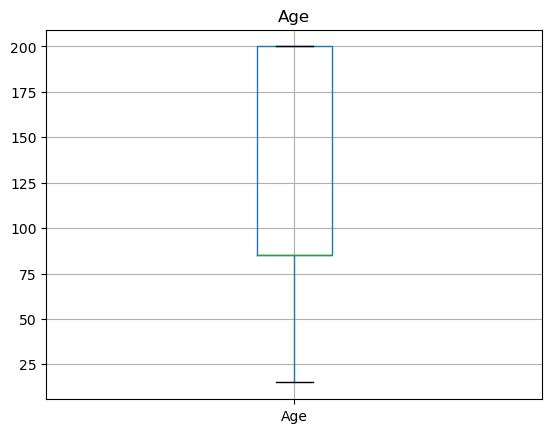

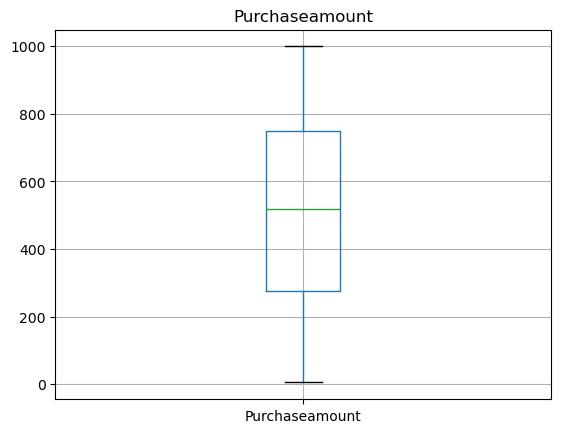

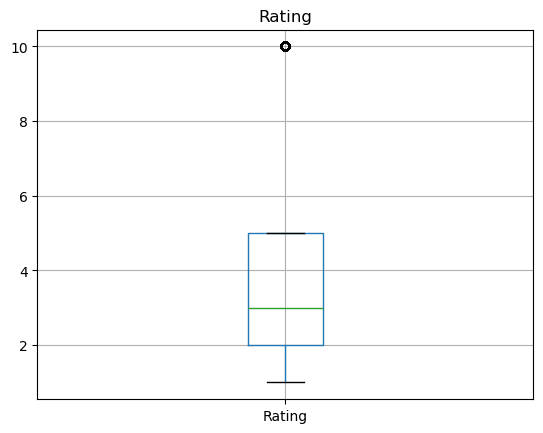

In [34]:
for col in num_cols:
    plt.figure()
    data.boxplot(column=col)
    plt.title(col)
    plt.show()

In [35]:
(data[['Purchaseamount','Rating','Age']] < 0).sum()


Purchaseamount    0
Rating            0
Age               0
dtype: int64

IQR bounds -> lower: -87.3886449184442, upper: 372.43318695106655
Number of statistical outliers: 0
count    1554.000000
mean       75.274241
std        18.778946
min        15.000000
25%        76.000000
50%        85.044542
75%        85.044542
max        90.000000
Name: Age, dtype: float64


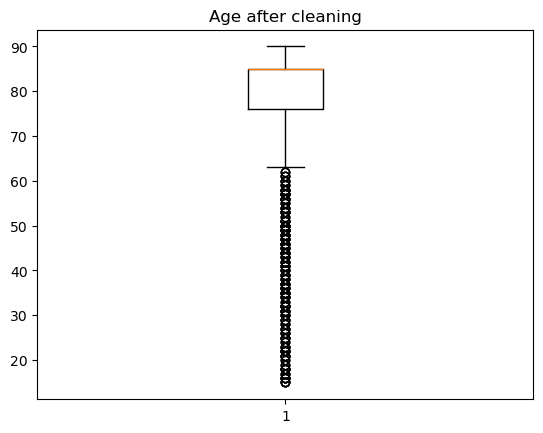

In [36]:
# Calculate Q1, Q3 and IQR
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(f"IQR bounds -> lower: {lower}, upper: {upper}")

# Find outliers (optional)
outliers = data[(data['Age'] < lower) | (data['Age'] > upper)]
print(f"Number of statistical outliers: {len(outliers)}")
                                            
data = data[(data['Age'] >= lower) & (data['Age'] <= upper)]

data = data[(data['Age'] >= 0) & (data['Age'] <= 100)]


# Check summary
print(data['Age'].describe())

# Check boxplot
plt.boxplot(data['Age'])
plt.title("Age after cleaning")
plt.show()



In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1554 entries, 0 to 2097
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Customerid       1554 non-null   object        
 1   Name             1554 non-null   object        
 2   Age              1554 non-null   float64       
 3   Email            1554 non-null   object        
 4   Phone            1554 non-null   object        
 5   Purchaseamount   1554 non-null   float64       
 6   Purchasedate     1554 non-null   datetime64[ns]
 7   Productcategory  1554 non-null   object        
 8   Rating           1554 non-null   float64       
 9   Gender           1554 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 133.5+ KB


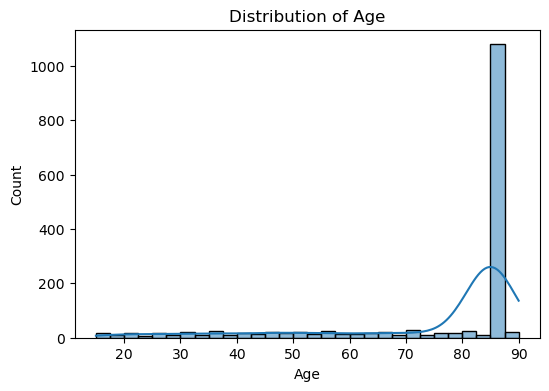

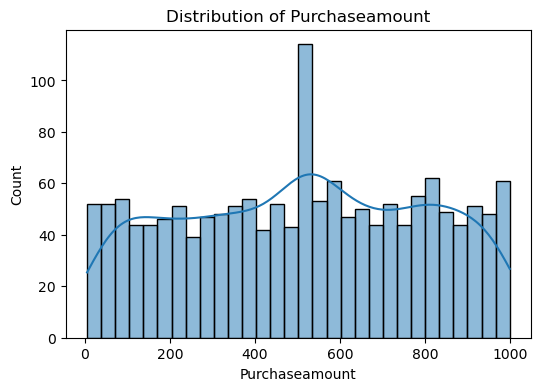

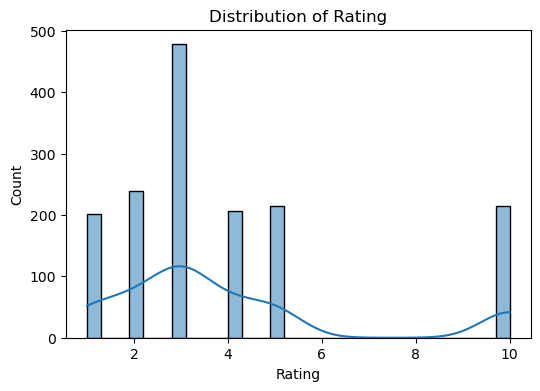

In [38]:
num_cols = data.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


# Data Analysis

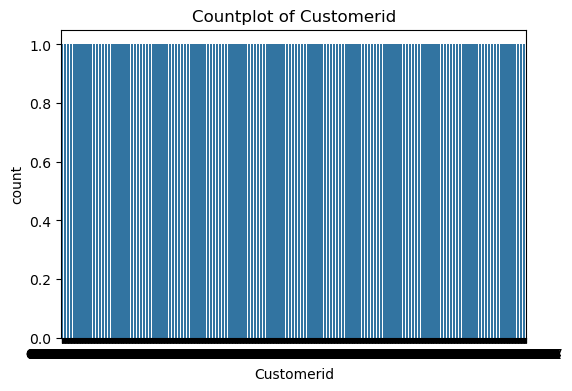

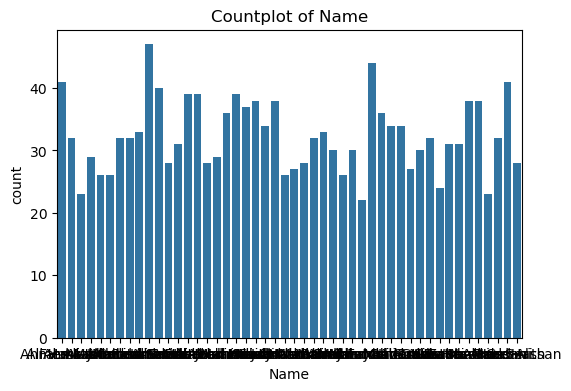

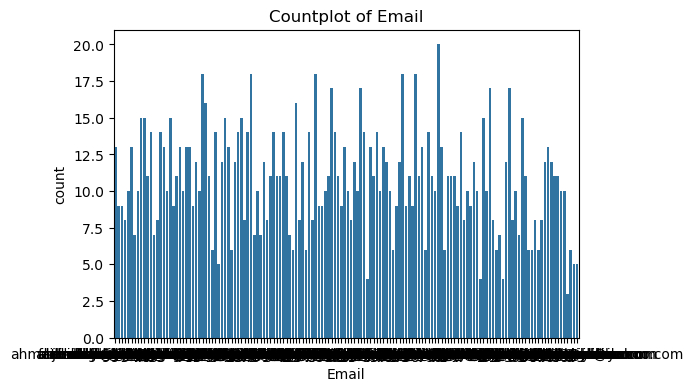

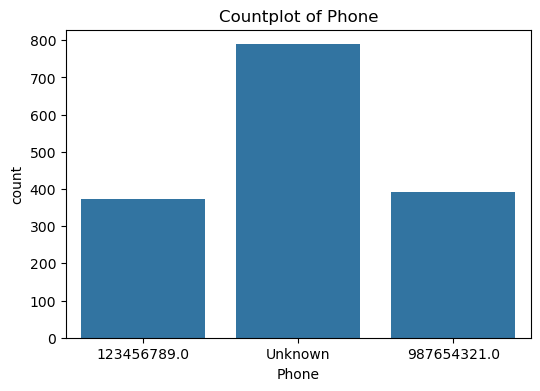

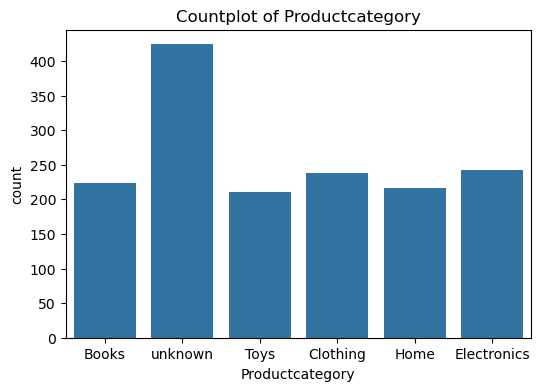

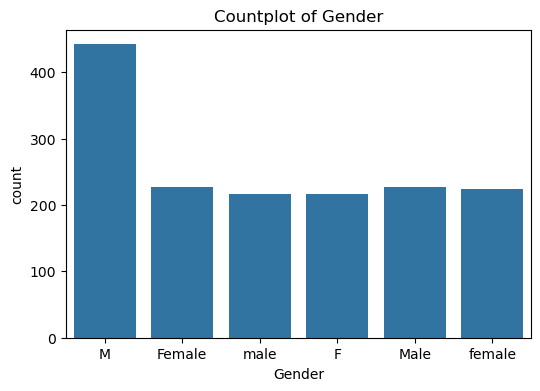

In [40]:
cat_cols = data.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=data)
    plt.title(f'Countplot of {col}')
    plt.show()


                     Age  Purchaseamount    Rating
Age             1.000000       -0.031734 -0.015520
Purchaseamount -0.031734        1.000000 -0.052867
Rating         -0.015520       -0.052867  1.000000


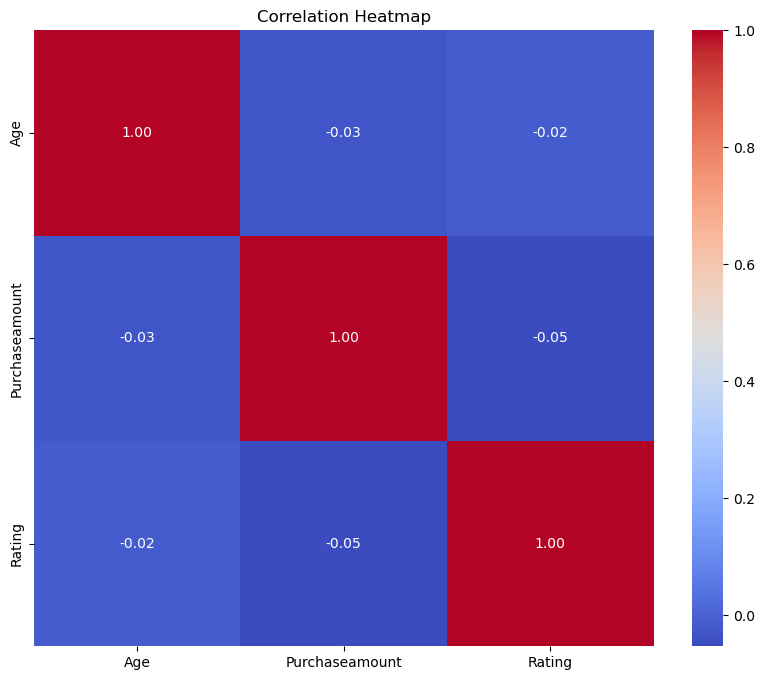

In [41]:
corr_matrix = data[num_cols].corr()
print(corr_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


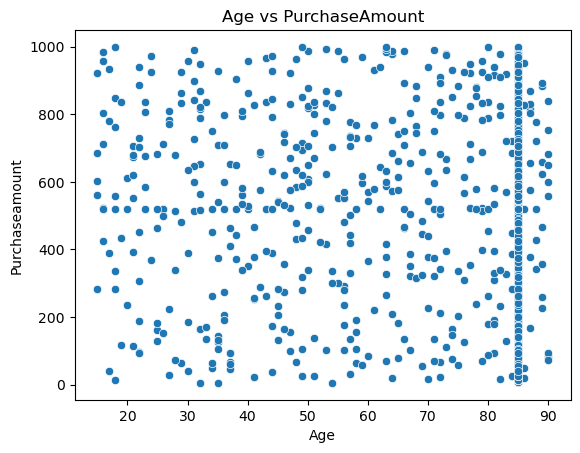

In [42]:
sns.scatterplot(x='Age', y='Purchaseamount', data=data)
plt.title("Age vs PurchaseAmount")
plt.show()


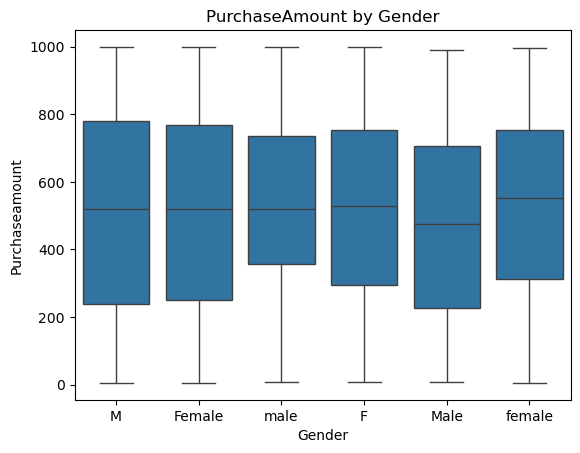

In [43]:
sns.boxplot(x='Gender', y='Purchaseamount', data=data)
plt.title("PurchaseAmount by Gender")
plt.show()


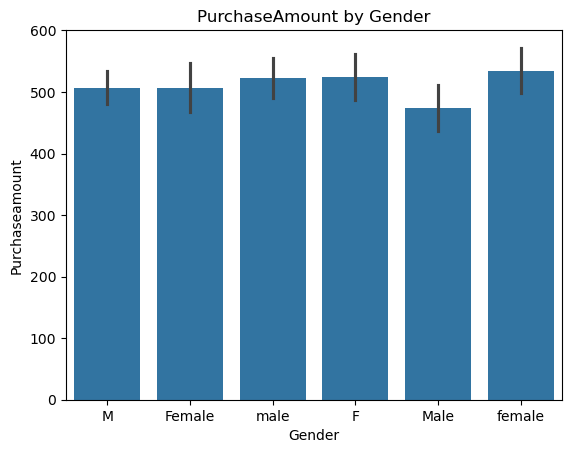

In [44]:
sns.barplot(x='Gender', y='Purchaseamount', data=data)
plt.title("PurchaseAmount by Gender")
plt.show()


In [45]:
data['Purchasedate '] = pd.to_datetime(data['Purchasedate '])

# Extract month, year, weekday
data['Year'] = data['PurchaseDate'].dt.year
data['Month'] = data['PurchaseDate'].dt.month
data['Weekday'] = data['PurchaseDate'].dt.day_name()

# Monthly purchases
monthly_sales = data.groupby('Month')['PurchaseAmount'].sum()
monthly_sales.plot(kind='bar')
plt.title("Monthly Sales")
plt.show()


KeyError: 'PurchaseDate'